In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
from sklearn import datasets

# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

In [2]:
# iris data
iris = datasets.load_iris()
list_iris = []

In [3]:
# dict keys가 무엇인지 확인
list_iris = iris.keys()
print(list_iris) 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
x = iris["data"][:, 3:] # 꽃잎의 너비 변수 사용
print(iris["target_names"]) # ['setosa' 'versicolor' 'virginica']

['setosa' 'versicolor' 'virginica']


In [6]:
y = (iris["target"]==2).astype("int") # iris-versinica면 1 아니면 0
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [7]:
log_reg = LogisticRegression(solver="liblinear")
# log_reg = LogisticRegression(solver='liblinear', random_state=42)
# sklearn의 LogisticRegression은 클래스 레이블을 반환하는 predict() 메소드
# 클래스에 속할 확률을 반환하는 predict_proba() 메소드를 가지고 있다.
# predict() 메소드는 확률 추정식에서 0보다 클 때를 양성 클래스로 판단하여 결과를 반환하고
# predict_proba 메소드는 시그모이드 함수를 적용하여 계산한 확률을 반환한다.
log_reg.fit(x, y)

LogisticRegression(solver='liblinear')

In [8]:
# 이제 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률을 계산해보자
x_new = np.linspace(0,3,1000).reshape(-1, 1) # -1의 의미는 변경된 배열의 위치의 차원은 원래 배열의 길이와 남은 차원으로부터 추정된다라는 뜻
y_proba = log_reg.predict_proba(x_new)

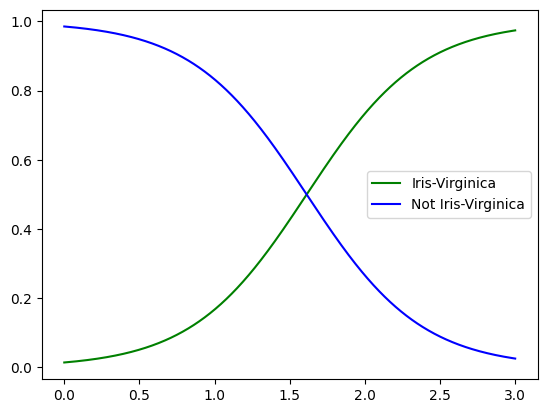

In [9]:
# # 음성 클래스
plt.plot(x_new, y_proba[:,1], 'g-', label='Iris-Virginica')
# # 양성 클래스
plt.plot(x_new, y_proba[:,0], 'b-', label='Not Iris-Virginica')
plt.legend()
plt.show()

In [10]:
# 좀 더 보기 좋게 표현해보자
x_new = np.linspace(0,3,1000).reshape(-1, 1) # -1의 의미는 변경된 배열의 위치의 차원은 원래 배열의 길이와 남은 차원으로부터 추정된다라는 뜻
y_proba = log_reg.predict_proba(x_new)
decision_boundary = x_new[y_proba[:,1] >= 0.5][0]

C:\Users\tempe\AppData\Roaming\Python\Python310\site-packages\matplotlib\patches.py:1479: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


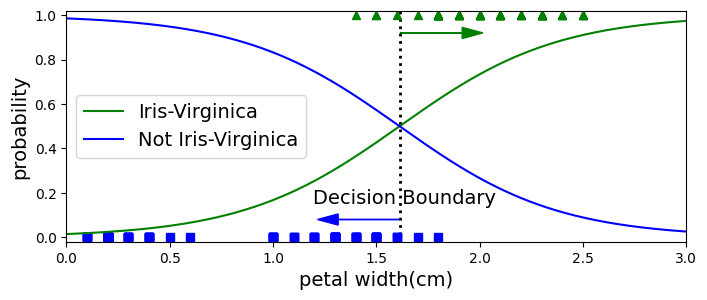

In [11]:
plt.figure(figsize=(8,3)) # 그래프 사이즈
plt.plot([decision_boundary, decision_boundary],[-1,2],'k:', linewidth=2)

plt.plot(x[y==0], y[y==0], 'bs') # 음성 범주
plt.plot(x[y==1], y[y==1], 'g^') # 양성 범주

plt.plot(x_new, y_proba[:,1], 'g-', label='Iris-Virginica')# 음성 클래스
plt.plot(x_new, y_proba[:,0], 'b-', label='Not Iris-Virginica')# 양성 클래스

# 결정 경계 표시
plt.text(decision_boundary+0.02, 0.15, 'Decision Boundary', fontsize=14, color="k", ha='center')
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel('petal width(cm)', fontsize=14)
plt.ylabel('probability', fontsize=14)
plt.legend(loc='center left', fontsize=14)
plt.axis([0, 3,-0.02, 1.02])
plt.show()

In [12]:
# 그러면 결정경계가 어떤 값을 가지고 분류하는가???
# 양쪽 확률이 50%가 되는 1.6cm 근방에서 결정경계가 만들어지고 분류기는 1.6cm보다 크면 Iris vigninica로 분류하고
# 1.6cm보다 작으면 아니라고 예측한다

# 실제로 그렇게 되는가?
test_data = log_reg.predict([[1.6156155],[1.48]])

# 1.6을 예상으로 기준을 두면 - 1.8은 true, 1.48은 false --> [1,0]
print(f"진짜 원하는 분류가 되나? 분류 기준 {decision_boundary} result --> {test_data}")

진짜 원하는 분류가 되나? 분류 기준 [1.61561562] result --> [1 0]
